In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/credit_risk_dataset.csv')

# Description des statistiques de base

In [14]:
shape = df.shape
print(f'Colonnes: {shape[1]}')
print(f'Lignes: {shape[0]}')

Colonnes: 12
Lignes: 32581


In [20]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [22]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Matrice de correlation

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64


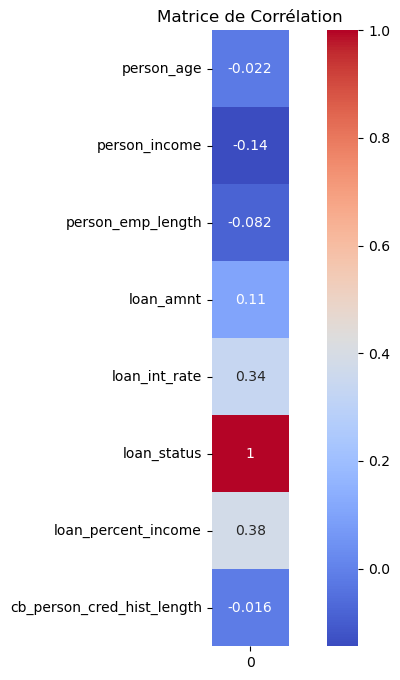

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

# Créer une matrice de corrélation entre le statut du prêt et les autres colonnes numériques
matrice_correlation = df[colonnes_numeriques].corrwith(df['loan_status'])

# Afficher la matrice de corrélation
print(matrice_correlation)

# Tracer la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation.to_frame(), annot=True, cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.show()

## Valeurs manquantes

In [34]:
# D'après la commande ci-dessous, nous pouvons voir que 
# les champs person_emp_length et loan_int_rate ont des valeurs manquantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [40]:
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [42]:
df[df['loan_int_rate'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


## Distribuition 

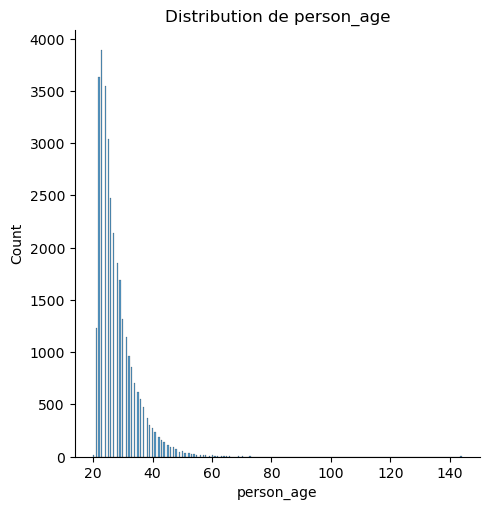

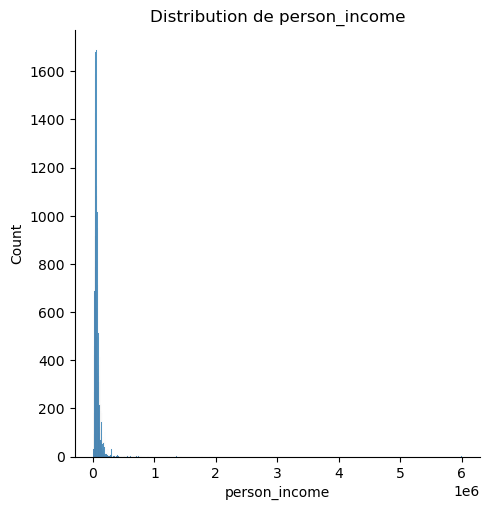

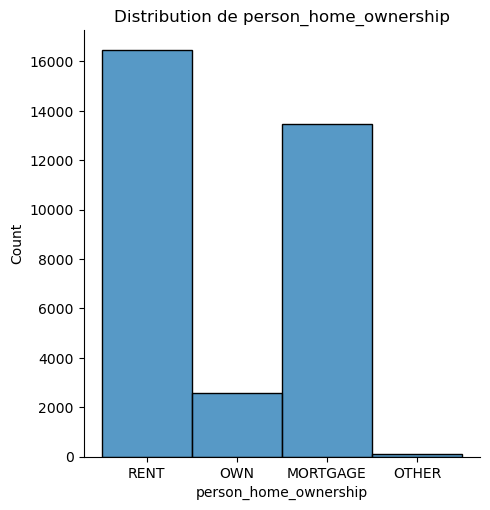

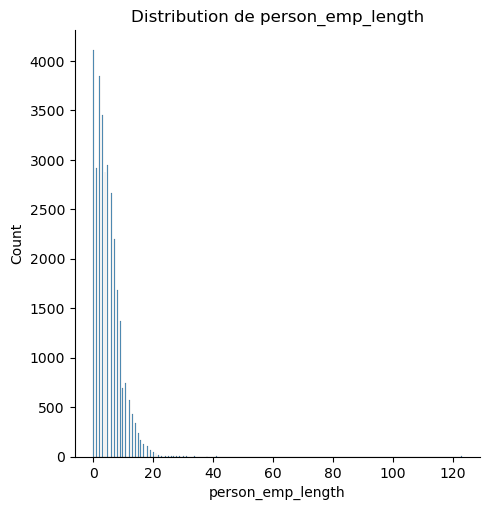

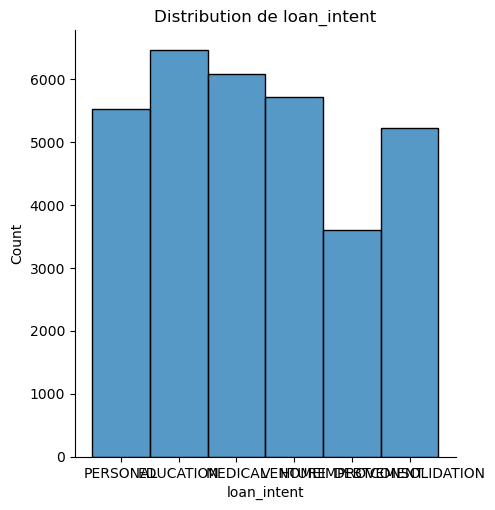

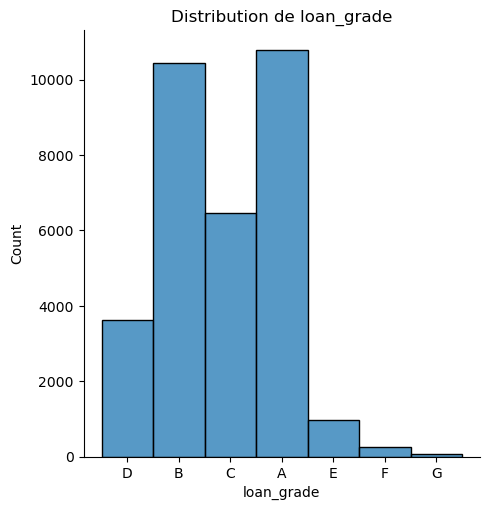

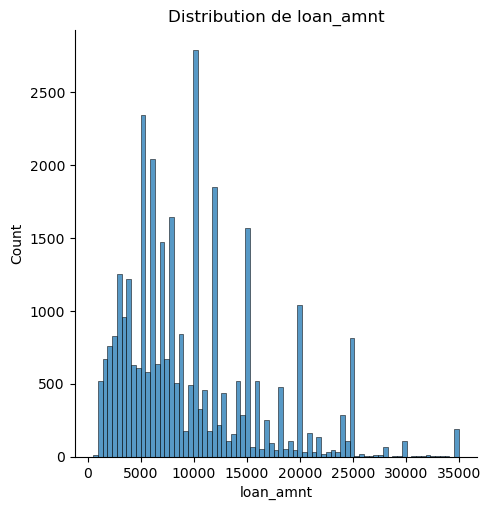

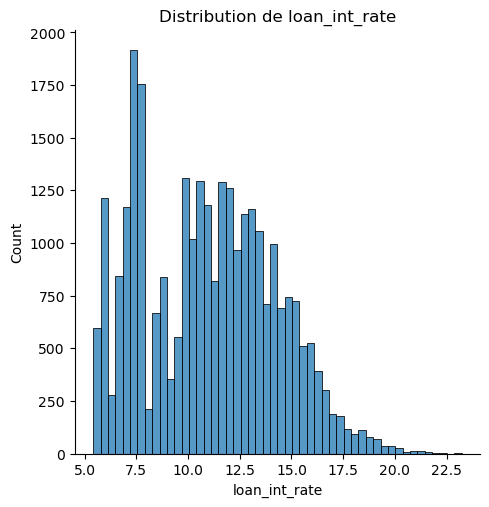

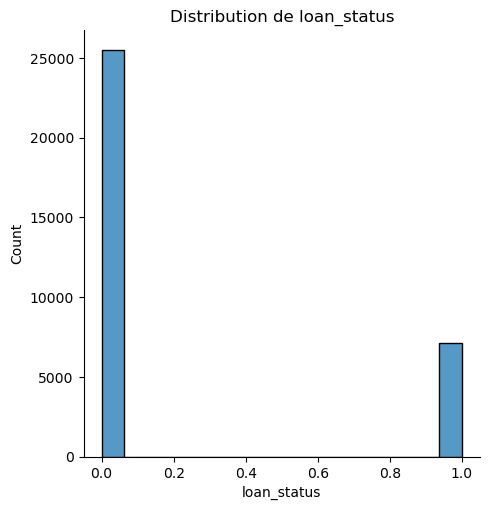

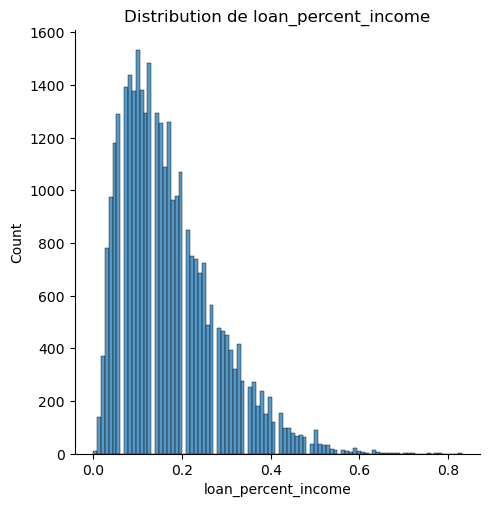

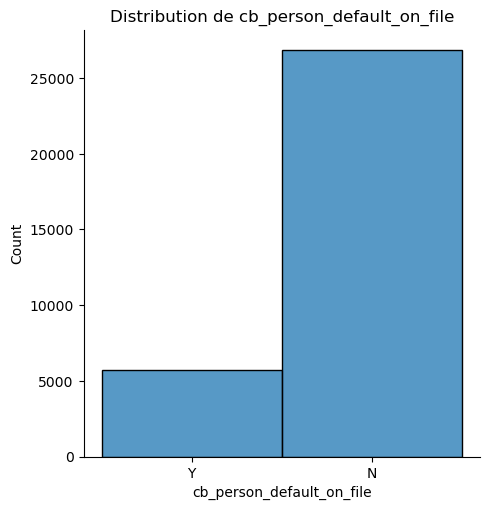

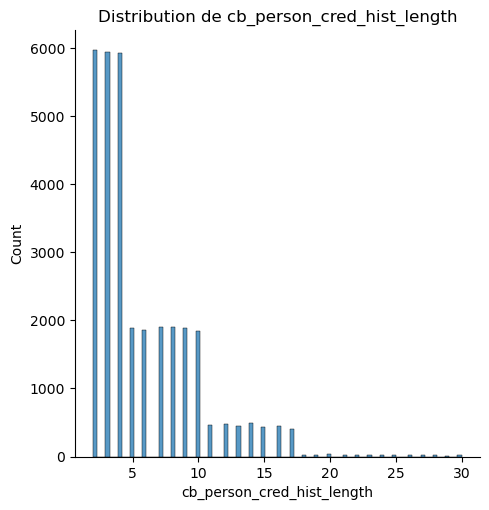

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns :
    sns.displot(df[col])
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

## Boxplot - Valeurs aberrantes
Les graphiques ci-dessous montrent quelques valeurs aberrantes. Par exemple, certains enregistrements ont des valeurs supérieures à 80 ans dans le champ âge

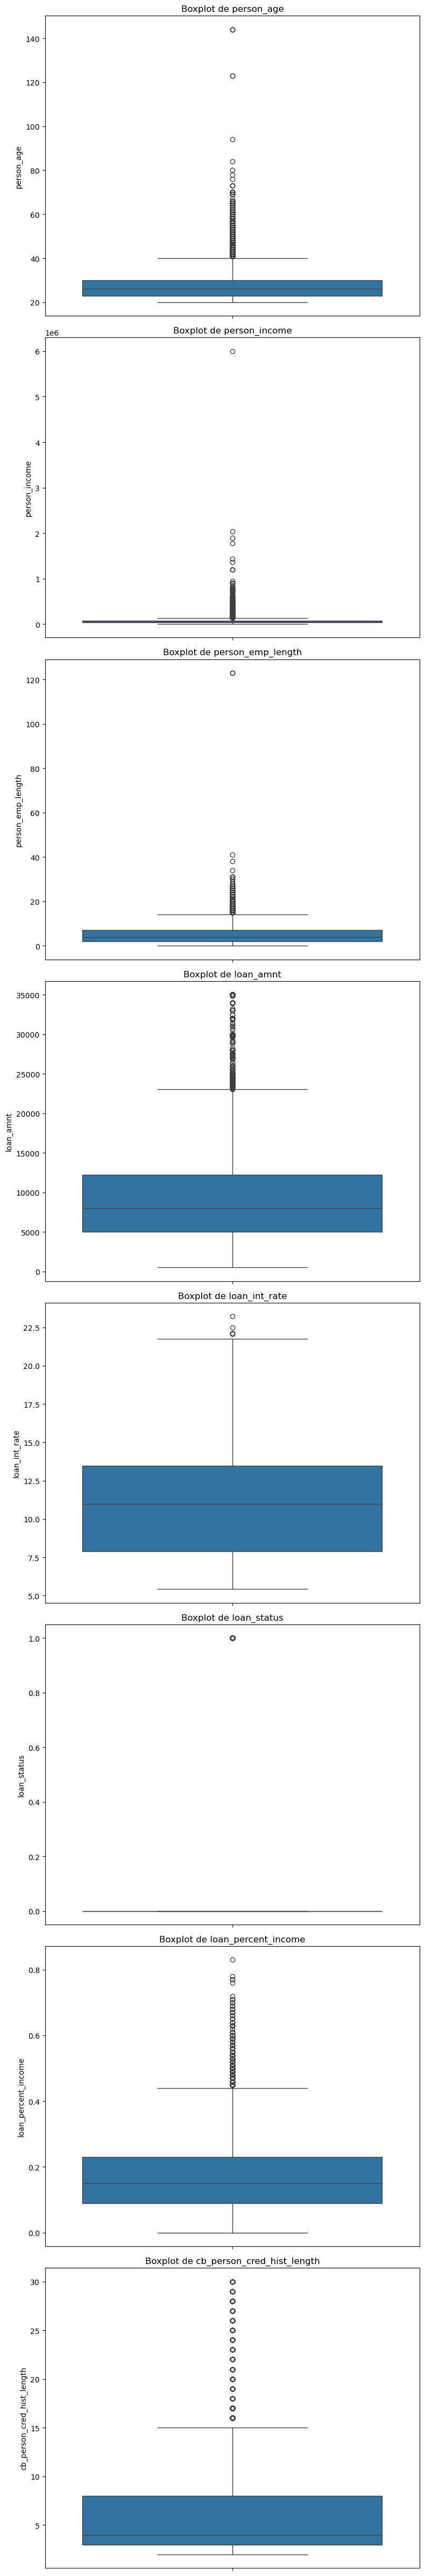

In [57]:

import seaborn as sns
import matplotlib.pyplot as plt

col_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(nrows=len(col_numeriques), figsize=(8, 6*len(col_numeriques)))
for i, col in enumerate(col_numeriques):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()